Задачи для первой лабораторной работы:
1) Визуализировать данные
2) Написать обучающийся алгоритм для фитирования этих данных (порядок кривой подбирать эмпирически)
3) Получить в результате кривую, аппроксимирующую эти данные (изобразить на графике), вывести функцию ошибки.
Не прибегайте к использованию библиотек для построения и обучения нейронных сетей (вроде tf и pytorch).

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = 11.7,8.27
plt.rcParams['font.size'] = 22

In [ ]:
data = []

with open('curve.txt', 'r') as f:
  data = pd.DataFrame([x.split() for x in f.read().split('\n')], columns=('x', 'y')).astype(float).dropna().sort_values('x')

In [ ]:
data

,x,y
140,-0.980512,2.468865
166,-0.966187,2.281423
182,-0.965306,2.251840
141,-0.940733,2.166412
53,-0.939782,2.131272
...,...,...
197,0.959752,-1.127485
167,0.968594,-1.352707
72,0.970256,-1.154587
60,0.980665,-1.369620


<AxesSubplot:xlabel='x', ylabel='y'>

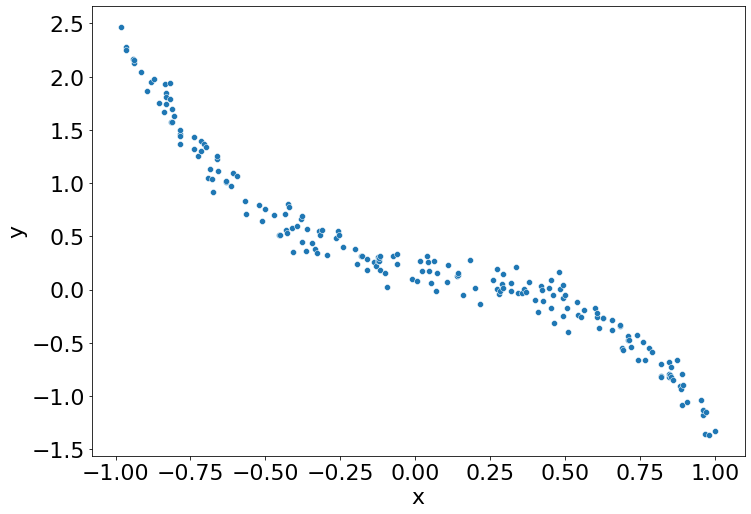

In [ ]:
sns.scatterplot(data=data, x='x', y='y')

In [ ]:
class PolynomailRegression() :

    def __init__( self, degree, learning_rate, iterations ) :

        self.degree = degree
        self.learning_rate = learning_rate
        self.iterations = iterations

    def transform( self, X ) :
        return np.swapaxes((np.array( [np.power( X, i ).reshape( -1, 1 ) for i in range(self.degree + 1)] ).reshape(self.degree + 1, self.m)), 0, 1)

    def normalize( self, X ) :

        X[:, 1:] = ( X[:, 1:] - np.mean( X[:, 1:], axis = 0 ) ) / np.std( X[:, 1:], axis = 0 )

        return X

    def fit( self, X, Y ) :

        self.X = X
        self.Y = Y
        self.m = self.X.shape[0]

        self.W = np.zeros( self.degree + 1 )

        X_transform = self.transform( self.X )

        X_normalize = self.normalize( X_transform )

        # gradient descent learning
        for i in range( self.iterations ) :

            h = self.predict( self.X )

            self.loss = h - self.Y
            # update weights
            self.W -= self.learning_rate * ( 1 / self.m ) * np.dot( X_normalize.T, self.loss)

        return self

    def get_loss(self):
      return np.mean(self.loss ** 2)

    def predict( self, X ) :
        X_transform = self.transform( X )

        X_normalize = self.normalize( X_transform )

        return np.dot( X_transform, self.W )


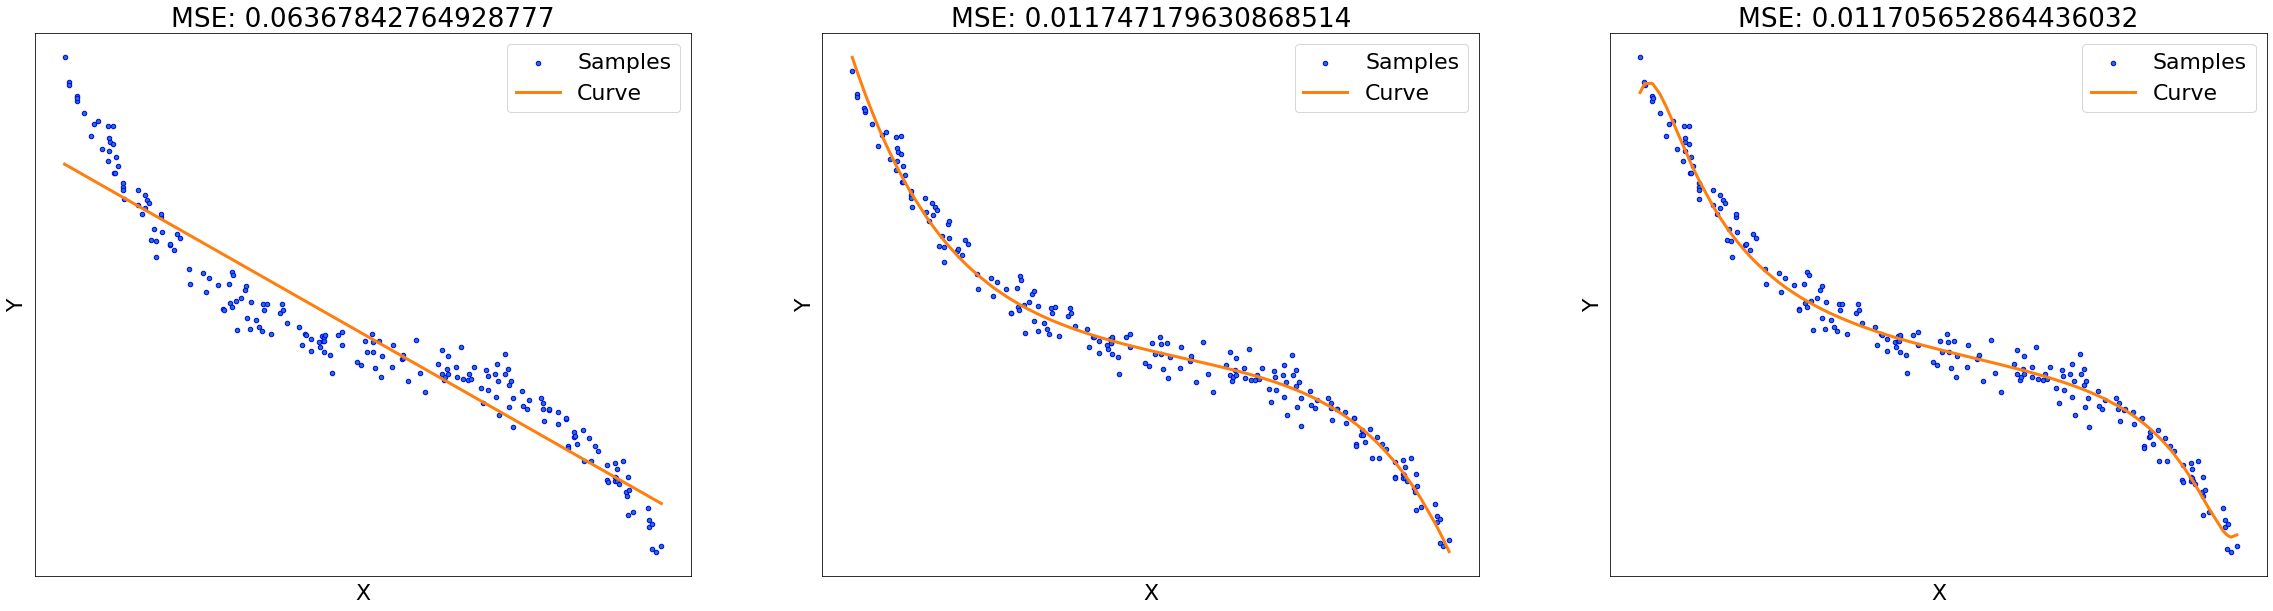

In [ ]:
degrees = [1, 5, 25]

plt.figure(figsize=(40, 10))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    X = data.x.values.reshape(-1, 1)
    y = data.y.values

    model = PolynomailRegression( degree = degrees[i], learning_rate = 0.01, iterations = 500 )

    model.fit( X, y )
    Y_pred = model.predict( X )

    plt.scatter( X, y, edgecolor='b', s=20, label='Samples')

    plt.plot( X, Y_pred, color = 'tab:orange', linewidth=3, label='Curve')

    plt.title(f'MSE: {model.get_loss()}')

    plt.xlabel( 'X' )

    plt.ylabel( 'Y' )

    plt.legend(loc="best")
plt.show()